<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/lesson_16_sklearn/HW_16_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report

from google.colab import data_table



In [89]:
housing = fch()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [90]:
X, y = fch(return_X_y=True, as_frame=True)
print(X.head(5))
print(y.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [91]:
# Создаём DataFrame для данных
Xy_df = pd.DataFrame(housing.data, columns=housing.feature_names)
Xy_df[housing.target_names[0]] = housing.target

Xy_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


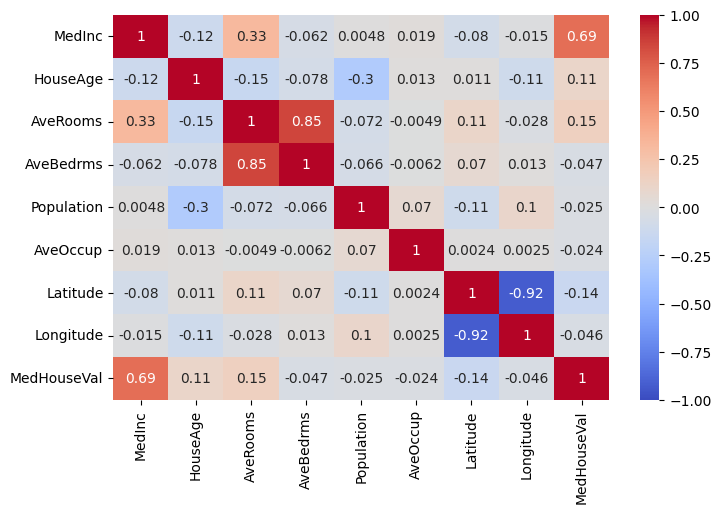

In [92]:
plt.rcParams['figure.figsize']=(8,5)
sns.heatmap(Xy_df.corr(numeric_only=True), vmin = -1, annot= True, cmap='coolwarm')
plt.show()

на матрице видим большую корреляцию для AveBedrms и AveRooms. Для модели - оставим только AveRooms.

Тоже самое видно для Latitude и	Longitude (для них посмотроим график и решим, какой из них оставим)

Так же есть сильная корреляция между Target и MedInc... вроде как его тоже надо исключить.
План:

1) построим по всем фичам

2) уберем Longitude и AveBedrms

3) уберем MedInc, Longitude и AveBedrms


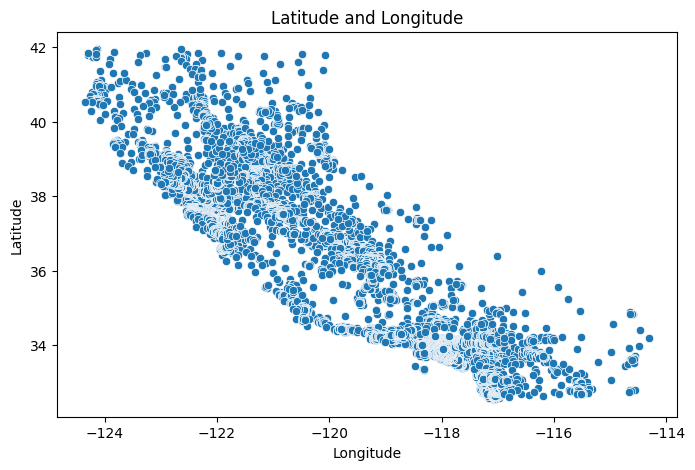

In [93]:
sns.scatterplot(data=X, x='Longitude', y='Latitude', legend=True)
plt.title('Latitude and Longitude')
plt.show()

<Figure size 800x500 with 0 Axes>

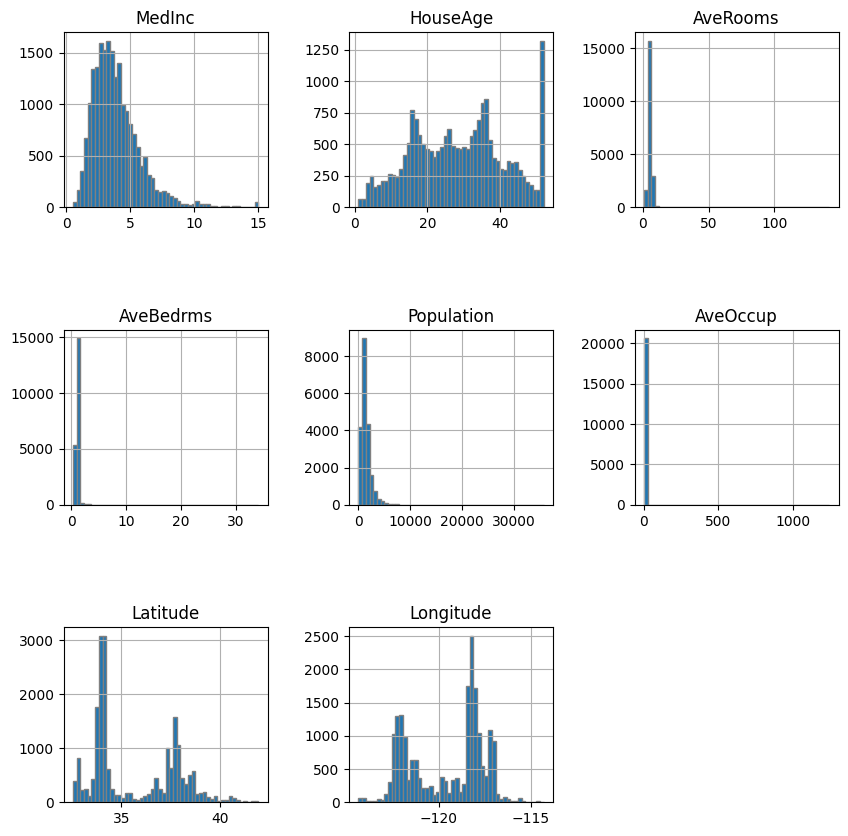

In [94]:
plt.suptitle('Histigrams')
X.hist(figsize=(10, 10), bins=50, edgecolor="gray")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


# **Линейная регрессия**

In [95]:
X1 = X.copy()
X_tr, X_t, y_tr, y_t = train_test_split(X1, y, random_state=33, test_size=0.25)
X_tr.shape, X_t.shape

((15480, 8), (5160, 8))

In [96]:
def LinReg(X, y):

  X_tr, X_t, y_tr, y_t = train_test_split(X, y, random_state=33, test_size=0.25)

  l_reg = LinearRegression().fit(X_tr, y_tr)
  print(f"Coef: \n{l_reg.coef_}")

  y_t_pred = l_reg.predict(X_t)
  y_tr_pred = l_reg.predict(X_tr)

  r2_t = r2_score(y_t, y_t_pred)
  r2_tr = r2_score(y_tr, y_tr_pred)
  mse_t = mean_squared_error(y_t, y_t_pred)
  mse_tr = mean_squared_error(y_tr, y_tr_pred)
  mae_t = mean_absolute_error(y_t, y_t_pred)
  mae_tr = mean_absolute_error(y_tr, y_tr_pred)

  print("\n------------------------------\n")

  df_result_metrics = pd.DataFrame({
      "Metric": ["R2_Score", "MSE", "MAE"],
      "Test Dataset" : [r2_t, mse_t, mae_t],
      "Train Dataset": [r2_tr, mse_tr, mae_tr]
      })

  print(df_result_metrics)
  # # plt.plot(X_tr, y_tr_pred, color='red', label='Linear regression')
  # # plt.scatter(X, y, label='Data')
  # plt.scatter(X_tr, y_tr, label='Training Data')
  # plt.scatter(X_t, y_t, label='Test Data')
  # plt.show()

In [97]:
# сначала построим Линейную регрессию по всем фичам
X1 = X.copy()
LinReg(X1, y)


Coef: 
[ 4.39821431e-01  8.76836617e-03 -1.10432914e-01  6.49236021e-01
 -9.96433215e-06 -3.35497814e-03 -4.23132587e-01 -4.37192643e-01]

------------------------------

     Metric  Test Dataset  Train Dataset
0  R2_Score      0.627844       0.598732
1       MSE      0.502957       0.531621
2       MAE      0.527747       0.531960


In [98]:
# убрем две колонки, как и собирались
X2 = X.drop(columns=["Longitude","AveBedrms"])
LinReg(X2, y)


Coef: 
[ 4.37405085e-01  1.72488588e-02 -1.91040349e-02  1.70486918e-05
 -4.12227422e-03 -4.45535470e-02]

------------------------------

     Metric  Test Dataset  Train Dataset
0  R2_Score      0.548595       0.511391
1       MSE      0.610060       0.647336
2       MAE      0.590795       0.596048


In [99]:
# убрем три колонки
X3 = X.drop(columns=["Longitude","AveBedrms", "MedInc"])
LinReg(X3, y)

Coef: 
[ 1.24525963e-02  8.41805957e-02  9.16233892e-06 -2.23329419e-03
 -8.79825150e-02]

------------------------------

     Metric  Test Dataset  Train Dataset
0  R2_Score      0.076246       0.065033
1       MSE      1.248424       1.238695
2       MAE      0.879739       0.873988


In [100]:
# убрем только 1 колонку
X4 = X.drop(columns=["MedInc"])
LinReg(X4, y)

Coef: 
[ 4.14052775e-03  3.46383485e-01 -1.36401551e+00 -2.00043432e-05
 -1.33100614e-03 -7.32577614e-01 -7.29289056e-01]

------------------------------

     Metric  Test Dataset  Train Dataset
0  R2_Score      0.412386       0.395091
1       MSE      0.794142       0.801415
2       MAE      0.686364       0.678826


Лучше всего модель работает по всем фичам.....

# **Логистическая регрессия**

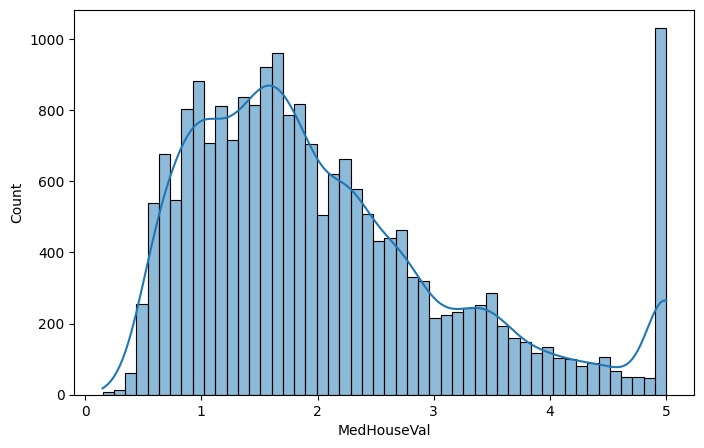

In [101]:
# посмотрим на распределение целевых значений
sns.histplot(Xy_df['MedHouseVal'], bins=50, kde=True)
plt.show()

Для бинарной классификации будем смотреть дом выше или ниже медианного значения.

In [102]:
median_value = Xy_df['MedHouseVal'].median()
Xy_df['AboveMedian'] = (Xy_df['MedHouseVal'] > median_value).astype(int)
Xy_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,AboveMedian
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0


In [103]:
X1 = Xy_df.drop(['MedHouseVal', 'AboveMedian'], axis=1)
y_bin = Xy_df['AboveMedian']
X_tr, X_t, y_tr_bin, y_t_bin = train_test_split(X1, y_bin, test_size=0.2, random_state=33)

binary_model = LogisticRegression(max_iter=1000).fit(X_tr, y_tr_bin)
y_t_pred = binary_model.predict(X_t)

print(classification_report(y_t_bin, y_t_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2059
           1       0.82      0.79      0.81      2069

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128



Для мульти - разделим таргет на 3 класса

In [117]:
Xy_df['Class'] = pd.cut(Xy_df['MedHouseVal'], bins=[0, 1, 2, 10], labels=[0, 1, 2])

X2 = Xy_df.drop(['MedHouseVal', 'AboveMedian', 'Class'], axis=1)
y_multi = Xy_df['Class']

X_tr, X_t, y_tr_multi, y_t_multi = train_test_split(X2, y_multi, test_size=0.2, random_state=33)

multi_model = LogisticRegression(max_iter=10000).fit(X_tr, y_tr_multi)
y_multi_pred = multi_model.predict(X_t)

print(classification_report(y_t_multi, y_multi_pred))

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal, AboveMedian, Class]
Index: []
              precision    recall  f1-score   support

           0       0.65      0.52      0.58       747
           1       0.60      0.66      0.63      1638
           2       0.78      0.77      0.77      1743

    accuracy                           0.68      4128
   macro avg       0.68      0.65      0.66      4128
weighted avg       0.68      0.68      0.68      4128

